In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Image dimensions
img_width, img_height = 150, 150

In [4]:
# Path to the main directory
train_data_dir = '/content/drive/MyDrive/google collllab/Elephant Dataset/train'
test_data_dir='/content/drive/MyDrive/google collllab/Elephant Dataset/test'

In [5]:
datagen=ImageDataGenerator(rescale=1. /255,validation_split=0.2)

In [6]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
    )

validation_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
    )


Found 40 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/5
2/2 [==============================] - 1s 347ms/step - loss: 0.6042 - accuracy: 0.9750 - val_loss: 0.8179 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 1s 787ms/step - loss: 0.5368 - accuracy: 0.8250 - val_loss: 0.8055 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 1s 987ms/step - loss: 0.4956 - accuracy: 0.9500 - val_loss: 0.8276 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 2s 1s/step - loss: 0.4437 - accuracy: 0.9500 - val_loss: 0.8171 - val_accuracy: 0.2500
Epoch 5/5
2/2 [==============================] - 1s 760ms/step - loss: 0.4209 - accuracy: 0.8000 - val_loss: 0.9423 - val_accuracy: 0.5000


In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 95ms/step - loss: 0.9423 - accuracy: 0.5000
Test Accuracy: 0.5


In [16]:
print(f"Final validation loss: {history.history['val_loss'][-1]}")

Final validation loss: 0.9423357248306274


In [17]:
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]}")

Final validation accuracy: 0.5


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_single_image(model, image_path):
    img = image.load_img(image_path, target_size=(150, 150))

    img_array = image.img_to_array(img)

    img_array /= 255.0

    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    predicted_class = int(prediction[0] > 0.5)

    labels = {0: 'African', 1: 'Asian'}
    print(f"Prediction: {labels[predicted_class]} - Raw output: {prediction[0]}")

predict_single_image(model, '/content/drive/MyDrive/google collllab/Elephant Dataset/train/African/af_tr3.jpg')


1/1 [==============================] - 0s 37ms/step
Prediction: African - Raw output: [0.14321256]


<ipython-input-19-e4a87f528613>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction[0] > 0.5)


1/1 [==============================] - 0s 119ms/step


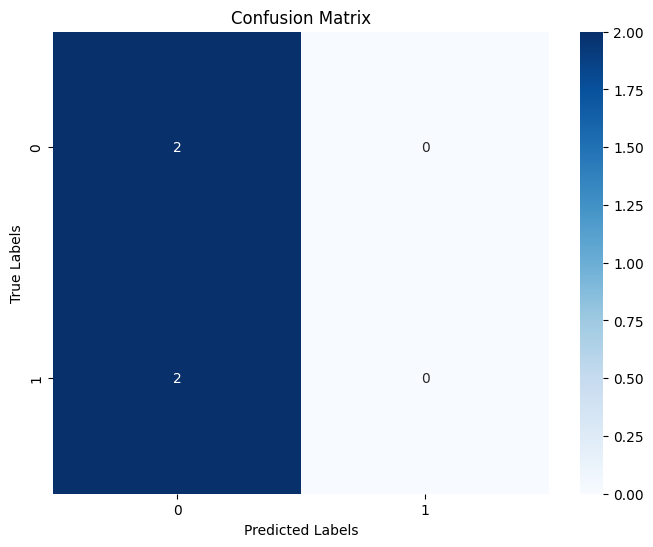

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get predictions for the entire validation set
def get_predictions(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)
    return y_true, (y_pred > 0.5).astype(int)

# Get predictions for the validation set
y_true, y_pred = get_predictions(model, validation_generator)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
